# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [147]:
import pandas as pd


In [148]:
df_md07t01 = pd.read_csv('demo01.csv')
print(df_md07t01.columns)
df_md07t01

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [149]:
#1)
df_md07t01_variaveis = pd.DataFrame(df_md07t01.dtypes).rename(columns={0:'Type'})
df_md07t01_variaveis


,Type
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [150]:
#2)
df_md07t01_variaveis['qtd_categorias'] = pd.DataFrame(df_md07t01.apply(lambda x: x.nunique()))
df_md07t01_variaveis

,Type,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [157]:
df_dummy = df_md07t01.select_dtypes(include='object')
df_dummy = pd.get_dummies(df_dummy)
df_dummy

,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,posse_de_imovel_Y,tipo_renda_Commercial associate,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16646,1,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16647,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16648,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [159]:
df_cat = df_md07t01.select_dtypes(exclude='object')
df_cat

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True
16646,0,43.389041,7.380822,1,1,1,0,2.0,True
16647,0,30.005479,9.800000,1,1,0,0,2.0,True
16648,0,30.005479,9.800000,1,1,0,0,2.0,True


In [164]:
df_cat_dummy =pd.concat([df_cat,df_dummy],axis=1)
df_cat_dummy

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,1,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,0,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,1,...,0,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,1,...,1,0,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [167]:
freq = pd.crosstab(df_md07t01.possui_email[df_md07t01.mau == 1],df_md07t01.posse_de_veiculo[df_md07t01.mau == 1])
freq_poderosa = freq.div(freq.sum(axis=1),axis=0)
freq_poderosa

posse_de_veiculo,N,Y
possui_email,,
0,0.647222,0.352778
1,0.466667,0.533333


Não possuier "EMAIL" é uma variável que melhor indica probabilidade de mau = 1


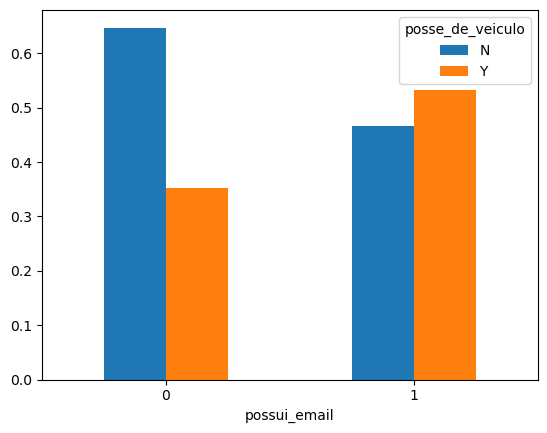

In [168]:

freq_poderosa.plot.bar().tick_params(axis='x',rotation=360)
print('Não possuier "EMAIL" é uma variável que melhor indica probabilidade de mau = 1')


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [169]:
df_cat_dummy.to_csv('dataframe_cat_dummy.csv')